# An Analysis of the Cybercrime landscape in an AI World📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

### How is AI Reshaping CyberCrime?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

### Since AI has become more readily available for the masses, has there been a distinct rise in cybercrime? Whether frequency or sophistication?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

### There has been a distinct rise in cybercrime sophistication. But it is a two sided coin, AI is used by threatactors but it is also being used by cybersecurity software and agents.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

### Global Cybersecurity Threats (2015-2024) https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
### Known Exploited Vulneratiblities Catalog https://www.cisa.gov/known-exploited-vulnerabilities-catalog
### Global Dataset of Cyber Incidents https://zenodo.org/records/14965395
### NIST National Vulnerabiltiy Database https://nvd.nist.gov/vuln/data-feeds 

### I'm going to use the datasets to see what trends or interesting statistics can be gleamed to prove or disprove my theory that AI has contributed greatly to the increase in cybercrime.

## Todo
### Need to find an ai adoption dataset, so i can compare the usage of ai to the statistics of the cybercrimes

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

### This analysis will employ a methodology to examine the relationship between AI availability and the increase in cybercrime. By leveraging multiple datasets spanning the period from 2017-2025, I will conduct trend analysis, correlation studies, and statistical evaluation to test the hypothesis that AI technologies have significantly contributed to the increase in cybercrime sophistication and incidents.

# Explorartory Data Analysis

## Visualizations

##### Cyber Attacks by Year (2015-2024)
* Shows cyber attacks by year. Shows if there has been an increase of decrease year over year
##### Global Threats - Attacks by Year and Industry (Stacked Bar):
* Shows attack distribution across industries from 2015-2024. Reveals consistent attack volumes with Healthcare and IT as frequent targets
##### Distribution of Attack Types (2015-2024) - Pie Chart:
* Even distribution across attack types (DDoS, Malware, Phishing, etc.) shows organizations must defend against diverse threats rather than focusing on single vectors
##### Cyber Incident Attributions by Year - Line Chart:
* Shows yearly cyber incident attributions. Peaks may correspond to major geopolitical events or increased threat intelligence sharing
##### Top 10 Initiator Countries (Attackers) - Horizontal Bar Chart:
* Identifies countries most frequently accused of attacks, revealing the geopolitical landscape of cyber conflict and offensive capabilities
##### Distribution of CVSS Scores for Known Exploited Vulnerabilities - Histogram:
* Concentration in 7-10 range confirms actively exploited vulnerabilities are high severity, validating CISA's prioritization for patching efforts
##### Average CVSS Score of Known Exploited Vulnerabilities by Year - Line Chart:
* Stable average around 7-8 shows attackers consistently target medium-to-high severity vulnerabilities with no improvement trend over time

## Data Cleansing Process
##### EUREPOC Attribution Dataset:
* Removed 1,623 rows with null attribution_year values since the analysis focused exclusively on year based trends. The null values for attribution_month and attribution_day were retained as they were not relevant to our temporal analysis. This cleaning step reduced the dataset size but ensured all records had the essential information needed for year-over-year comparisons and trend analysis.
##### Known Exploited Vulnerabilities (KEV) Dataset:
* The KEV dataset required merging with the National Vulnerability Database (NVD) to obtain CVSS scores, which were not included in the original CISA catalog. I loaded NVD JSON files (2015-2025), extracted CVSS v3.1, v3.0, and v2.0 scores, and performed a left join on cveID to preserve all KEV records. A combined cvss_score column was created by prioritizing the most recent CVSS version available (v3.1 > v3.0 > v2.0), enabling severity analysis of actively exploited vulnerabilities.
##### Global Cybersecurity Threats Dataset:
* This dataset contained minimal null values and required no significant cleaning. I verified data types for temporal fields (Year) and numeric fields (Financial Loss, Number of Affected Users) to ensure proper aggregation and visualization. The dataset was already pretty well structured with consistent categorical values across attack types, industries, countries, and defense mechanisms.

## Machine Learning
### *<font color = 'red'>We haven't covered machine learning yet but I included since it's in the grading criteria</font>*
#### What types of machine learning could I use in your project?
##### Sources: https://builtin.com/data-science/supervised-machine-learning-classification
* For this project, supervised learning classification would be most applicable for predicting attack severity levels, attack types, and attacker categories based on historical patterns. Regression models could forecast financial losses and incident resolution times. Unsupervised learning through clustering could identify emerging threat patterns and group similar vulnerabilities or attack campaigns. Time series forecasting would be valuable for predicting future attack trends and vulnerability discovery rates across industries and regions.
#### What issues do I see in making that happen?
* The primary issues include data quality problems with missing values and incomplete records, imbalance where certain attack types or threat actors dominate the dataset, and the challenge of obtaining negative examples (vulnerabilities not exploited).
#### What challenges will I potentially face?
##### Sources: https://research.aimultiple.com/model-drift/
* The main challenges include rapid evolution of cyber threats making historical data quickly outdated. Small datasets and imbalanced classes (rare attack types) lead to overfitting and poor predictions. Attribution data lacks objective ground truth, creating accuracy uncertainty. Models may learn spurious correlations rather than actual causal relationships. 


In [28]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load datasets
eurepoc_attribution_data = pd.read_csv('./data/eurepoc_attribution_dataset_1.3.csv')
global_security_threats = pd.read_csv('./data/Global_Cybersecurity_Threats_2015_2024.csv')
known_exploited_vulnerabilities = pd.read_csv('./data/known_exploited_vulnerabilities.csv')



In [3]:
# Display basic statistics of the datasets
display(eurepoc_attribution_data.describe())
display(global_security_threats.describe())
display(known_exploited_vulnerabilities.describe())

,attribution_id,incident_id,attribution_year,attribution_month,attribution_day
count,5217.000000,5217.000000,3594.000000,2652.000000,2652.000000
mean,13214.748706,2063.765957,2021.347524,6.549020,14.459276
std,9083.859541,1237.533017,3.576563,3.184899,8.251895
min,6.000000,2.000000,2000.000000,1.000000,1.000000
25%,1469.000000,980.000000,2020.000000,4.000000,9.000000
50%,15260.000000,2027.000000,2023.000000,7.000000,14.000000
75%,22200.000000,3215.000000,2024.000000,9.000000,20.000000
max,25781.000000,4163.000000,2025.000000,12.000000,31.000000


,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


,cveID,vendorProject,product,vulnerabilityName,dateAdded,shortDescription,requiredAction,dueDate,knownRansomwareCampaignUse,notes,cwes
count,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1287
unique,1449,238,589,1139,343,1364,40,363,2,1449,211
top,CVE-2025-54236,Microsoft,Windows,Microsoft Win32k Privilege Escalation Vulnerab...,2021-11-03,Google Chromium V8 Engine contains a type conf...,Apply updates per vendor instructions.,2022-05-03,Unknown,https://experienceleague.adobe.com/en/docs/exp...,CWE-20
freq,1,348,157,23,287,9,893,174,1149,1,87


In [4]:
# Display information about the datasets
display(eurepoc_attribution_data.info())
display(global_security_threats.info())
display(known_exploited_vulnerabilities.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   attribution_id         5217 non-null   int64  
 1   incident_id            5217 non-null   int64  
 2   attribution_year       3594 non-null   float64
 3   attribution_month      2652 non-null   float64
 4   attribution_day        2652 non-null   float64
 5   attribution_date       5217 non-null   object 
 6   attribution_basis      5217 non-null   object 
 7   attribution_type       5217 non-null   object 
 8   attribution_subtype    5217 non-null   object 
 9   attributing_country    5217 non-null   object 
 10  attributing_actor      5217 non-null   object 
 11  attributing_company    5217 non-null   object 
 12  settled_attribution    5054 non-null   object 
 13  initiator_name         5217 non-null   object 
 14  initiator_alpha_2      5217 non-null   object 
 15  init

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   cveID                       1449 non-null   object
 1   vendorProject               1449 non-null   object
 2   product                     1449 non-null   object
 3   vulnerabilityName           1449 non-null   object
 4   dateAdded                   1449 non-null   object
 5   shortDescription            1449 non-null   object
 6   requiredAction              1449 non-null   object
 7   dueDate                     1449 non-null   object
 8   knownRansomwareCampaignUse  1449 non-null   object
 9   notes                       1449 non-null   object
 10  cwes                        1287 non-null   object
dtypes: object(11)
memory usage: 124.7+ KB


None

In [5]:
# Display first few rows of the datasets
display(eurepoc_attribution_data.head())
display(global_security_threats.head())
display(known_exploited_vulnerabilities.head())

,attribution_id,incident_id,attribution_year,attribution_month,attribution_day,attribution_date,attribution_basis,attribution_type,attribution_subtype,attributing_country,attributing_actor,attributing_company,settled_attribution,initiator_name,initiator_alpha_2,initiator_country,initiator_category,initiator_subcategory
0,6,6,NaN,NaN,NaN,Not available,Attacker confirms,Self-attribution in the course of the attack (...,Not available,Not available,Not available,Not available,True,Unknown,US,United States,Non-state-group,Hacktivist(s)
1,7,7,NaN,NaN,NaN,Not available,Attacker confirms,Self-attribution in the course of the attack (...,Not available,Not available,Not available,Not available,True,Antijapan,KR,"Korea, Republic of",Non-state-group,Hacktivist(s)
2,10,10,2013.0,NaN,NaN,2013,Attribution by third-party,"Direct statement in media report (e.g., Reuter...",Not available,Not available,Not available,Not available,True,NSA/Equation Group,US,United States,State,Not available
3,11,11,2005.0,NaN,NaN,2005,Attribution by receiver government / state entity,"Anonymous statement in media report (e.g., Reu...",Not available,Not available,Not available,Not available,True,Unknown,CN,China,State affiliated actor,Not available
4,12,11,2005.0,NaN,NaN,2005,IT-security community attributes attacker,"Technical report (e.g., by IT-companies, Citiz...",Not available,Not available,Not available,Not available,NaN,Unknown,CN,China,State affiliated actor,Not available


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


,cveID,vendorProject,product,vulnerabilityName,dateAdded,shortDescription,requiredAction,dueDate,knownRansomwareCampaignUse,notes,cwes
0,CVE-2025-54236,Adobe,Commerce and Magento,Adobe Commerce and Magento Improper Input Vali...,2025-10-24,Adobe Commerce and Magento Open Source contain...,"Apply mitigations per vendor instructions, fol...",2025-11-14,Unknown,https://experienceleague.adobe.com/en/docs/exp...,CWE-20
1,CVE-2025-59287,Microsoft,Windows,Microsoft Windows Server Update Service (WSUS)...,2025-10-24,Microsoft Windows Server Update Service (WSUS)...,"Apply mitigations per vendor instructions, fol...",2025-11-14,Unknown,https://msrc.microsoft.com/update-guide/en-US/...,CWE-502
2,CVE-2025-61932,Motex,LANSCOPE Endpoint Manager,Motex LANSCOPE Endpoint Manager Improper Verif...,2025-10-22,Motex LANSCOPE Endpoint Manager contains an im...,"Apply mitigations per vendor instructions, fol...",2025-11-12,Unknown,https://www.motex.co.jp/news/notice/2025/relea...,CWE-940
3,CVE-2022-48503,Apple,Multiple Products,Apple Multiple Products Unspecified Vulnerability,2025-10-20,"Apple macOS, iOS, tvOS, Safari, and watchOS co...","Apply mitigations per vendor instructions, fol...",2025-11-10,Unknown,https://support.apple.com/en-us/HT213340 ; htt...,NaN
4,CVE-2025-2746,Kentico,Xperience CMS,Kentico Xperience CMS Authentication Bypass Us...,2025-10-20,Kentico Xperience CMS contains an authenticati...,"Apply mitigations per vendor instructions, fol...",2025-11-10,Unknown,https://devnet.kentico.com/download/hotfixes ;...,CWE-288


In [6]:
# Display null value counts for each dataset
display(eurepoc_attribution_data.isnull().sum())
display(global_security_threats.isnull().sum())
display(known_exploited_vulnerabilities.isnull().sum())

attribution_id              0
incident_id                 0
attribution_year         1623
attribution_month        2565
attribution_day          2565
attribution_date            0
attribution_basis           0
attribution_type            0
attribution_subtype         0
attributing_country         0
attributing_actor           0
attributing_company         0
settled_attribution       163
initiator_name              0
initiator_alpha_2           0
initiator_country           0
initiator_category          0
initiator_subcategory      18
dtype: int64

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

cveID                           0
vendorProject                   0
product                         0
vulnerabilityName               0
dateAdded                       0
shortDescription                0
requiredAction                  0
dueDate                         0
knownRansomwareCampaignUse      0
notes                           0
cwes                          162
dtype: int64

In [7]:
# Europoc attribution data specific null analysis
display(f'Original dataset size: {len(eurepoc_attribution_data)}')
display(f'Rows with null attribution_year: {eurepoc_attribution_data["attribution_year"].isnull().sum()}')

# Remove rows where attribution_year is null
eurepoc_attribution_data = eurepoc_attribution_data[eurepoc_attribution_data['attribution_year'].notna()]
display(f'Dataset size after removing null years: {len(eurepoc_attribution_data)}')

# Verify no null values remain in attribution_year
display(known_exploited_vulnerabilities.isnull().sum())

# Preview of the cleaned data
display(eurepoc_attribution_data.head())

'Original dataset size: 5217'

'Rows with null attribution_year: 1623'

'Dataset size after removing null years: 3594'

cveID                           0
vendorProject                   0
product                         0
vulnerabilityName               0
dateAdded                       0
shortDescription                0
requiredAction                  0
dueDate                         0
knownRansomwareCampaignUse      0
notes                           0
cwes                          162
dtype: int64

,attribution_id,incident_id,attribution_year,attribution_month,attribution_day,attribution_date,attribution_basis,attribution_type,attribution_subtype,attributing_country,attributing_actor,attributing_company,settled_attribution,initiator_name,initiator_alpha_2,initiator_country,initiator_category,initiator_subcategory
2,10,10,2013.0,NaN,NaN,2013,Attribution by third-party,"Direct statement in media report (e.g., Reuter...",Not available,Not available,Not available,Not available,True,NSA/Equation Group,US,United States,State,Not available
3,11,11,2005.0,NaN,NaN,2005,Attribution by receiver government / state entity,"Anonymous statement in media report (e.g., Reu...",Not available,Not available,Not available,Not available,True,Unknown,CN,China,State affiliated actor,Not available
4,12,11,2005.0,NaN,NaN,2005,IT-security community attributes attacker,"Technical report (e.g., by IT-companies, Citiz...",Not available,Not available,Not available,Not available,NaN,Unknown,CN,China,State affiliated actor,Not available
5,15,13,2009.0,NaN,NaN,2009,Attribution by third-party,"Attribution given, type unclear",Not available,Not available,Not available,Not available,True,Unknown,KP,"Korea, Democratic People's Republic of",State,Not available
6,18,15,2004.0,NaN,NaN,2004,Attribution by third-party,"Attribution given, type unclear",Not available,Not available,Not available,Not available,True,Unknown,CN,China,State affiliated actor,Not available


,Year,Number of Attacks
0,2015,277
1,2016,285
2,2017,319
3,2018,310
4,2019,263
5,2020,315
6,2021,299
7,2022,318
8,2023,315
9,2024,299


'Bar Plot of Cyber Attacks by Year (2015-2024), trying to determine any trends'

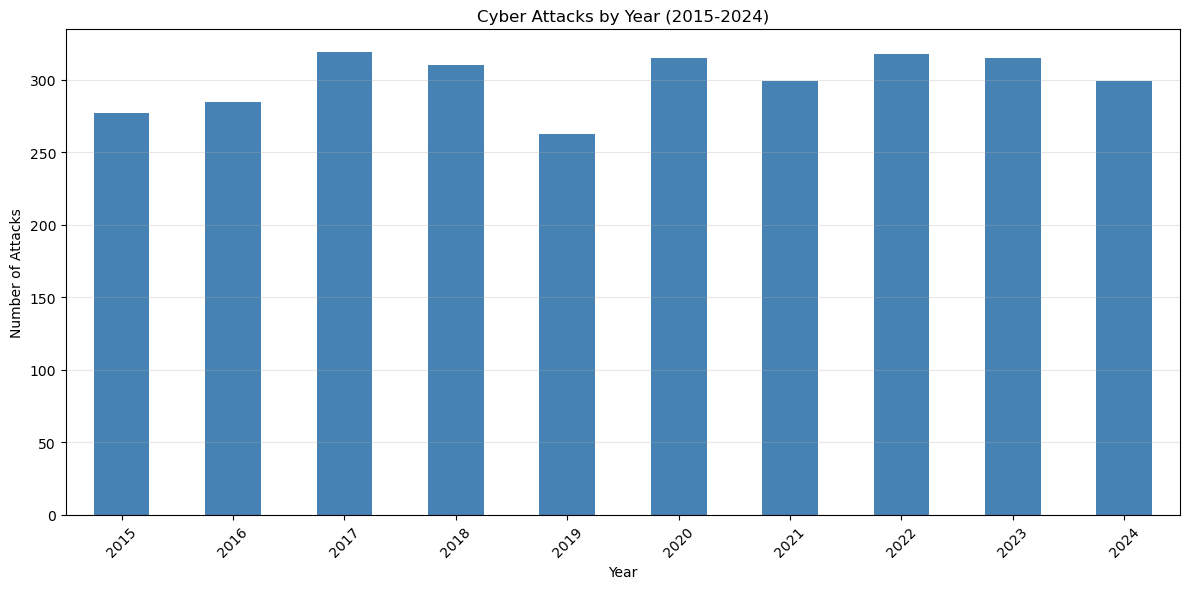

'Bar Plot of Cyber Attacks by Year and Target Industry, again trying to determine any trends'

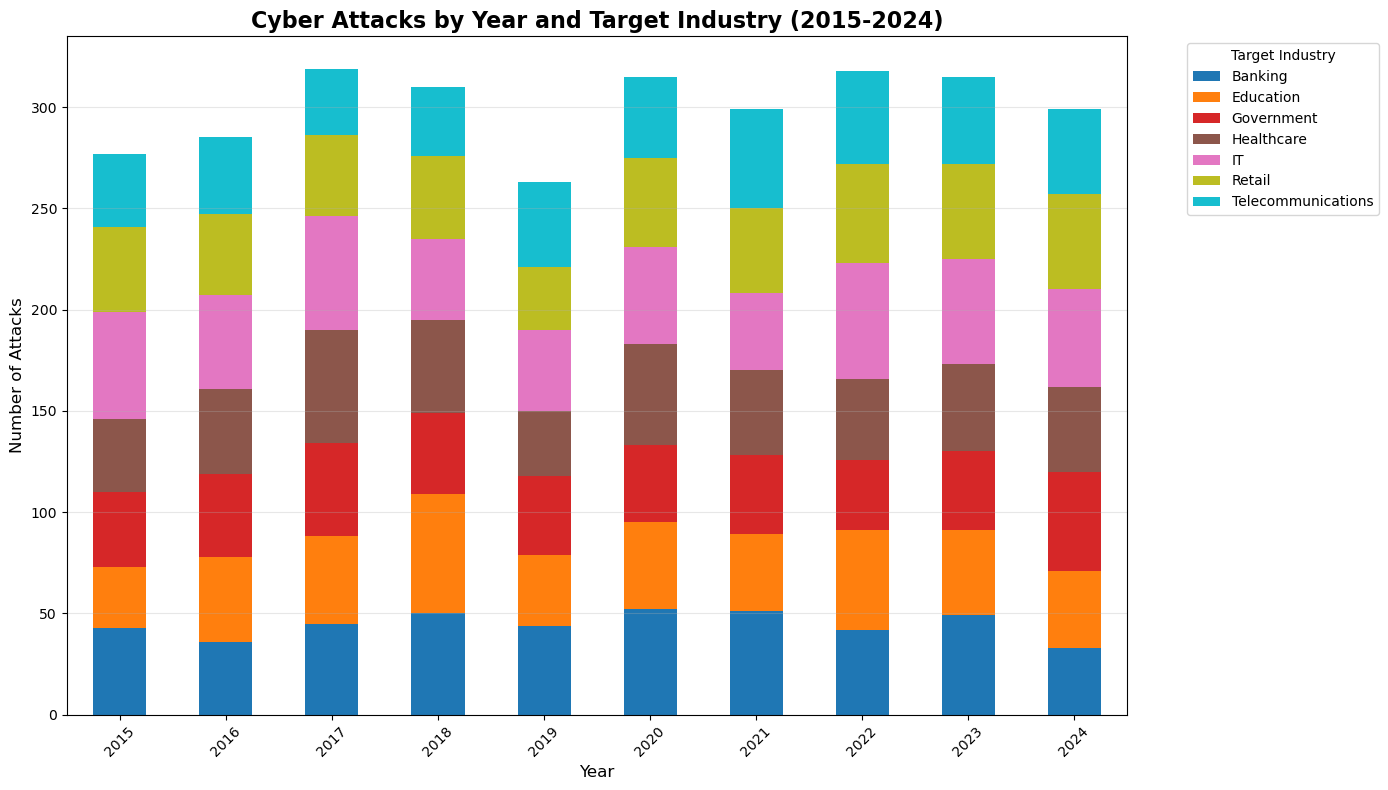

'Pie Chart of Attack Type Distribution to understand the prevalence of different attack types'

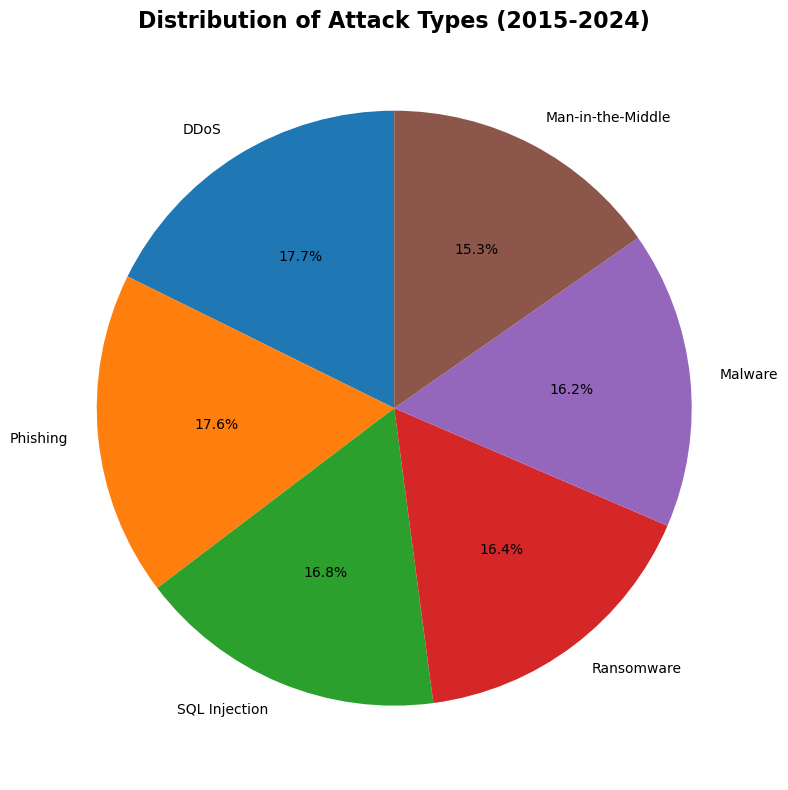

In [8]:
# Global security threats data specific analysis
# import matplotlib
import matplotlib.pyplot as plt

# Variables for analysis
attacks_by_year = global_security_threats['Year'].value_counts().sort_index()
industry_year = pd.crosstab(global_security_threats['Year'], global_security_threats['Target Industry'])
attack_counts = global_security_threats['Attack Type'].value_counts()

# Count of cyber attacks by year
attacks_by_year_df = attacks_by_year.reset_index()
attacks_by_year_df.columns = ['Year', 'Number of Attacks']
display(attacks_by_year_df)

# Bar plot of cyber attacks by year
display('Bar Plot of Cyber Attacks by Year (2015-2024), trying to determine any trends')
plt.figure(figsize=(12, 6))
attacks_by_year.plot(kind='bar', color='steelblue')
plt.title('Cyber Attacks by Year (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Bar plot of cyber attacks by year and target industry
display('Bar Plot of Cyber Attacks by Year and Target Industry, again trying to determine any trends')
fig, ax = plt.subplots(figsize=(14, 8))
industry_year.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
plt.title('Cyber Attacks by Year and Target Industry (2015-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(title='Target Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

display('Pie Chart of Attack Type Distribution to understand the prevalence of different attack types')
# Pie chart of attack type distribution
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attack Types (2015-2024)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

'Line Chart of Cyber Incident Attributions by Year to identify trends in attributions over time'

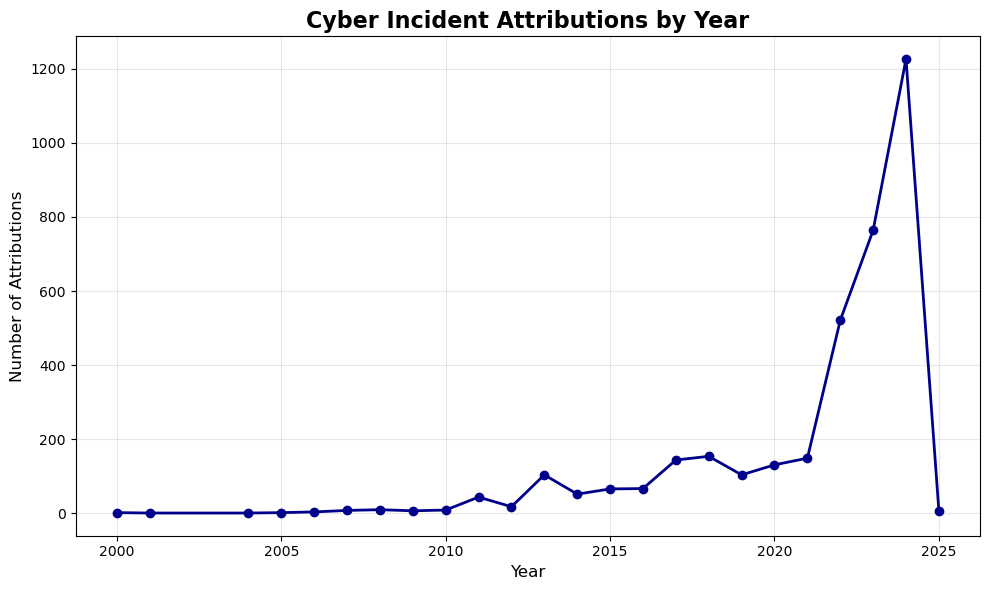

'Horizontal Bar Chart of Top 10 Countries Where Attack Originated to see which countries are most frequently attributed as sources of cyber attacks'

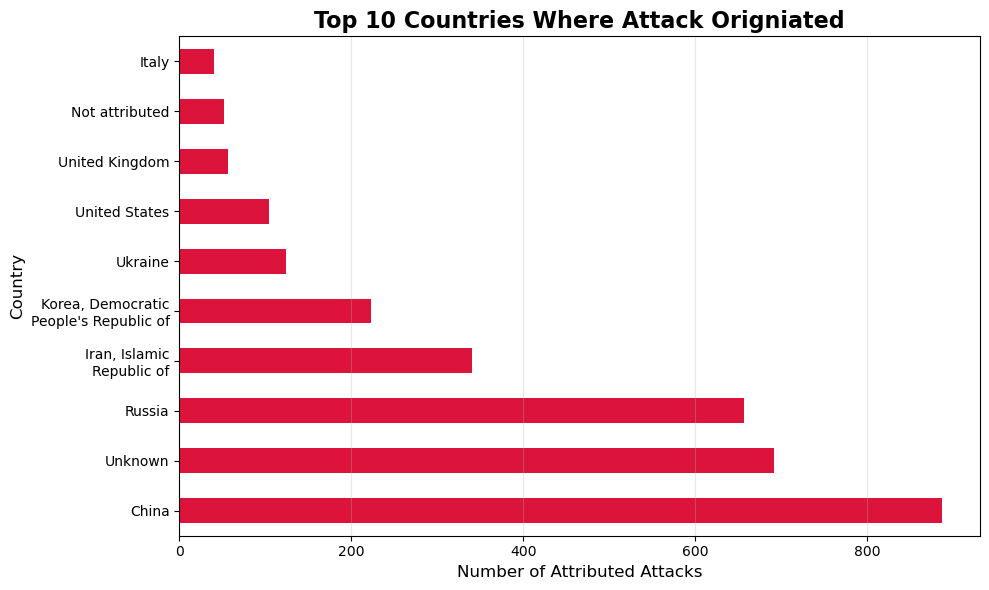

In [9]:
# Europoc attribution data analysis

# Variables for analysis
attacks_by_year = eurepoc_attribution_data['attribution_year'].value_counts().sort_index()
top_origin = eurepoc_attribution_data['initiator_country'].value_counts().head(10)

# Attribution Trends Over Time
display('Line Chart of Cyber Incident Attributions by Year to identify trends in attributions over time')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(attacks_by_year.index, attacks_by_year.values, marker='o', linewidth=2, color='darkblue')
plt.title('Cyber Incident Attributions by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attributions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

display('Horizontal Bar Chart of Top 10 Countries Where Attack Originated to see which countries are most frequently attributed as sources of cyber attacks')
fig, ax = plt.subplots(figsize=(10, 6))
# Some names are too long, so we wrap them for better display
import textwrap
top_origin.index = ['\n'.join(textwrap.wrap(str(name), width=20)) for name in top_origin.index]

top_origin.plot(kind='barh', ax=ax, color='crimson')
plt.title('Top 10 Countries Where Attack Origniated', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attributed Attacks', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



In [10]:
# Add nvd_cve_dateset, the known exploited vulnerabilities dataset did not contain CVE scores
nvd_full = pd.read_csv('./data/nvd_cve_data_2015_2025.csv')

# Select columns
nvd_selected = nvd_full[['cveID', 'cvss_v31_score', 'cvss_v30_score', 'cvss_v2_score', 'description']]

display('NVD Selected Columns:')
display(nvd_selected.head())

# Merge the datasets
kev_with_scores = pd.merge(known_exploited_vulnerabilities, nvd_selected, on='cveID', how='left')

# Create a combined CVSS score column
kev_with_scores['cvss_score'] = kev_with_scores['cvss_v31_score'].fillna(
    kev_with_scores['cvss_v30_score']
).fillna(kev_with_scores['cvss_v2_score'])

# Display results
display('\nMERGED DATASET')
display(f'Total KEV entries: {len(kev_with_scores)}')
display(f'KEV entries with CVSS scores: {kev_with_scores["cvss_score"].notna().sum()}')

display('\nColumns in merged dataset:')
display(kev_with_scores.columns.tolist())

display('\nSample merged data:')
display(kev_with_scores[['cveID', 'vendorProject', 'product', 'cvss_v31_score', 'cvss_v30_score', 'cvss_v2_score', 'cvss_score']].head(10))

#
kev_with_scores.to_csv('./data/kev_with_cvss_scores.csv', index=False)
display('\n Merged dataset saved!')

'NVD Selected Columns:'

,cveID,cvss_v31_score,cvss_v30_score,cvss_v2_score,description
0,CVE-2015-0361,NaN,NaN,7.8,"Use-after-free vulnerability in Xen 4.2.x, 4.3..."
1,CVE-2015-0917,NaN,NaN,4.3,Cross-site scripting (XSS) vulnerability in th...
2,CVE-2015-0918,NaN,NaN,4.3,Cross-site scripting (XSS) vulnerability in th...
3,CVE-2015-0919,NaN,NaN,7.5,Multiple SQL injection vulnerabilities in the ...
4,CVE-2015-0920,NaN,NaN,6.8,Cross-site request forgery (CSRF) vulnerabilit...


'\nMERGED DATASET'

'Total KEV entries: 1449'

'KEV entries with CVSS scores: 976'

'\nColumns in merged dataset:'

['cveID',
 'vendorProject',
 'product',
 'vulnerabilityName',
 'dateAdded',
 'shortDescription',
 'requiredAction',
 'dueDate',
 'knownRansomwareCampaignUse',
 'notes',
 'cwes',
 'cvss_v31_score',
 'cvss_v30_score',
 'cvss_v2_score',
 'description',
 'cvss_score']

'\nSample merged data:'

,cveID,vendorProject,product,cvss_v31_score,cvss_v30_score,cvss_v2_score,cvss_score
0,CVE-2025-54236,Adobe,Commerce and Magento,NaN,NaN,NaN,NaN
1,CVE-2025-59287,Microsoft,Windows,NaN,NaN,NaN,NaN
2,CVE-2025-61932,Motex,LANSCOPE Endpoint Manager,NaN,NaN,NaN,NaN
3,CVE-2022-48503,Apple,Multiple Products,8.8,NaN,NaN,8.8
4,CVE-2025-2746,Kentico,Xperience CMS,NaN,NaN,NaN,NaN
5,CVE-2025-2747,Kentico,Xperience CMS,NaN,NaN,NaN,NaN
6,CVE-2025-33073,Microsoft,Windows,NaN,NaN,NaN,NaN
7,CVE-2025-61884,Oracle,E-Business Suite,NaN,NaN,NaN,NaN
8,CVE-2025-54253,Adobe,Experience Manager (AEM) Forms,NaN,NaN,NaN,NaN
9,CVE-2025-47827,IGEL,IGEL OS,NaN,NaN,NaN,NaN


'\n Merged dataset saved!'

'Combined KEV and CVSS Scores Dataset Overview, again trying to understand the data better'

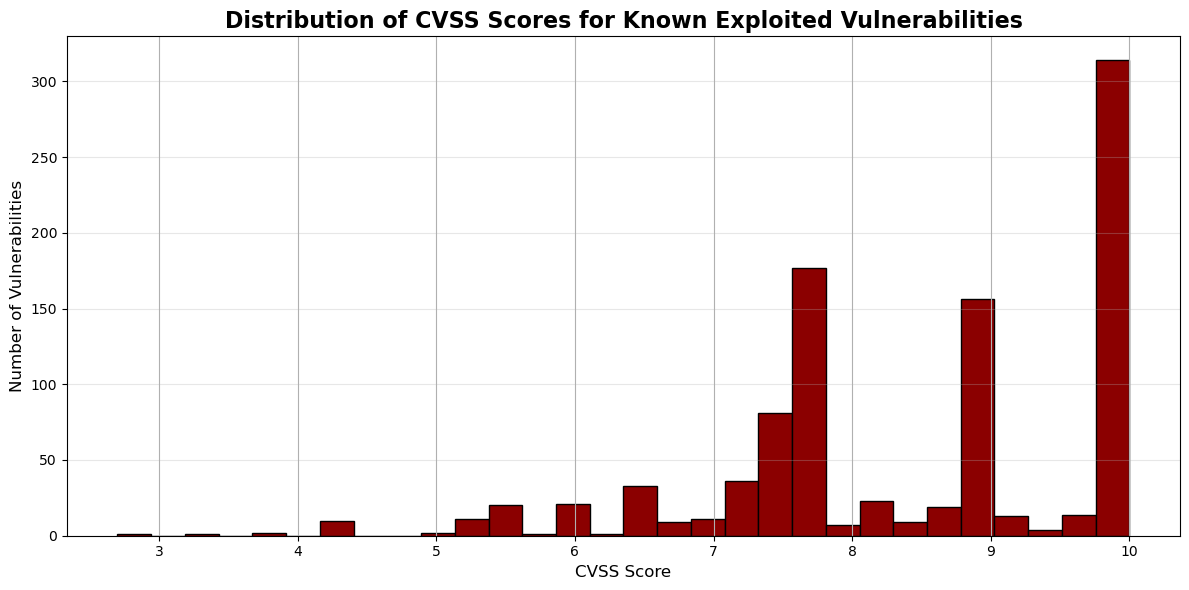

'Average CVSS Score by Year Added to KEV Catalog, to see if there are trends in severity over time'

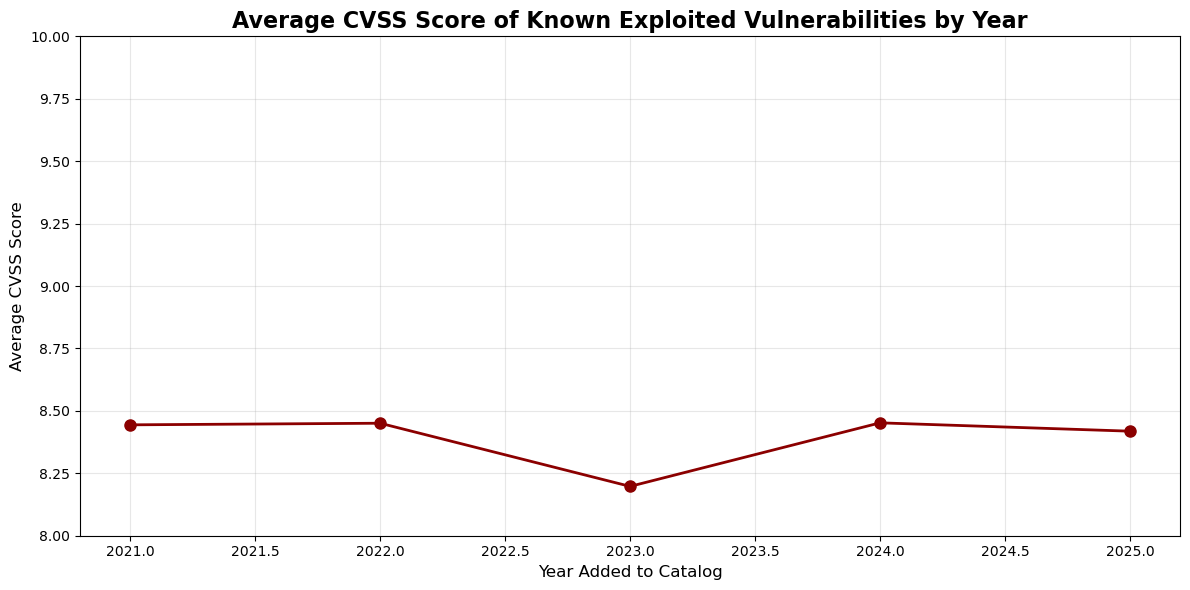

'Average CVSS Score by Year:'

year_added
2021    8.44
2022    8.45
2023    8.20
2024    8.45
2025    8.42
Name: cvss_score, dtype: float64

'\nNumber of Vulnerabilities Added Each Year:'

year_added
2021    311
2022    555
2023    187
2024    186
2025    210
dtype: int64

In [ ]:
# Intial analysis on new dataset
merged_data = pd.read_csv('./data/kev_with_cvss_scores.csv')

display('Combined KEV and CVSS Scores Dataset Overview, again trying to understand the data better')
# Distribution of CVSS scores
fig, ax = plt.subplots(figsize=(12, 6))
kev_with_scores['cvss_score'].dropna().hist(bins=30, ax=ax, color='darkred', edgecolor='black')
plt.title('Distribution of CVSS Scores for Known Exploited Vulnerabilities', fontsize=16, fontweight='bold')
plt.xlabel('CVSS Score', fontsize=12)
plt.ylabel('Number of Vulnerabilities', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

kev_with_scores['dateAdded'] = pd.to_datetime(kev_with_scores['dateAdded'])

# Extract year
kev_with_scores['year_added'] = kev_with_scores['dateAdded'].dt.year

avg_cvss_by_year = kev_with_scores.groupby('year_added')['cvss_score'].mean()

display('Average CVSS Score by Year Added to KEV Catalog, to see if there are trends in severity over time')
# Create line chart for yearly average score
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(avg_cvss_by_year.index, avg_cvss_by_year.values, marker='o', linewidth=2, color='darkred', markersize=8)
plt.title('Average CVSS Score of Known Exploited Vulnerabilities by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year Added to Catalog', fontsize=12)
plt.ylabel('Average CVSS Score', fontsize=12)
plt.ylim(8, 10) 
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data
display('Average CVSS Score by Year:')
display(avg_cvss_by_year.round(2))

# Additional stats by year
display('\nNumber of Vulnerabilities Added Each Year:')
display(kev_with_scores.groupby('year_added').size())

## Machine Learning Implmentation Process 
(Ask, Prepare, Process, Analyze, Evaluate, Share)

* This includes:
    * EDA process that allows for identifying issues
    * Splitting the dataset into training and test sets
    * Data cleaning process using sci-kit learn pipelines
        * Data imputation
        * Data Scaling and Normalization
        * Handling of Categorical Data
    * Testing multiple algorithms and models
    * Evaluating the different models and choosing one.


### EDA Process for Identifying Issues

'EDA Process that allows for identifying issues'

'Dataset Overview:'

'Total records in kev_with_scores:'

1449

'Columns:'

['cveID',
 'vendorProject',
 'product',
 'vulnerabilityName',
 'dateAdded',
 'shortDescription',
 'requiredAction',
 'dueDate',
 'knownRansomwareCampaignUse',
 'notes',
 'cwes',
 'cvss_v31_score',
 'cvss_v30_score',
 'cvss_v2_score',
 'description',
 'cvss_score',
 'year_added',
 'days_since_added']

'Missing Values in Key Columns:'

year_added      0
cvss_score    473
dtype: int64

'\nData Types:'

year_added      int32
cvss_score    float64
dtype: object

'Statistical Summary:'

,year_added,cvss_score
count,1449.000000,976.000000
mean,2022.605935,8.404098
std,1.339990,1.334952
min,2021.000000,2.700000
25%,2022.000000,7.800000
50%,2022.000000,8.800000
75%,2024.000000,9.800000
max,2025.000000,10.000000


'Check for Infinite Values:'

'Infinite values in year_added:'

np.int64(0)

'Infinite values in cvss_score:'

np.int64(0)

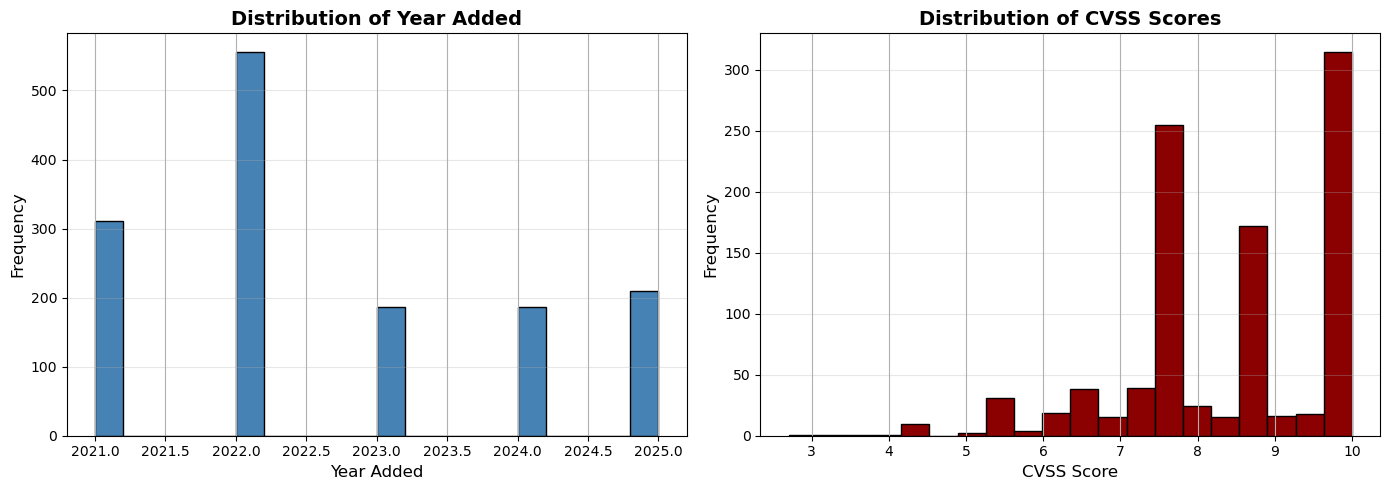

In [21]:
display('EDA Process that allows for identifying issues')

# Check the dataset we'll use for ML
display('Dataset Overview:')
display('Total records in kev_with_scores:', len(kev_with_scores))
display('Columns:', kev_with_scores.columns.tolist())

# Check for missing values in key columns
display('Missing Values in Key Columns:')
ml_columns = ['year_added', 'cvss_score']
display(kev_with_scores[ml_columns].isnull().sum())

# Check data types
display('\nData Types:')
display(kev_with_scores[ml_columns].dtypes)

# Statistical summary
display('Statistical Summary:')
display(kev_with_scores[ml_columns].describe())

# Check for any infinite values
display('Check for Infinite Values:')
display('Infinite values in year_added:', np.isinf(kev_with_scores["year_added"]).sum())
display('Infinite values in cvss_score:', np.isinf(kev_with_scores["cvss_score"].dropna()).sum())

# Distribution visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Year distribution
kev_with_scores['year_added'].hist(bins=20, ax=ax1, color='steelblue', edgecolor='black')
ax1.set_xlabel('Year Added', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Year Added', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# CVSS Score distribution
kev_with_scores['cvss_score'].dropna().hist(bins=20, ax=ax2, color='darkred', edgecolor='black')
ax2.set_xlabel('CVSS Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of CVSS Scores', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Splitting the Dataset into Training and Test Sets

In [ ]:
# Split the dataset into training and test sets
display('Splitting dataset into training and test sets')

# Prepare the data - remove rows with missing CVSS scores
ml_data = kev_with_scores[['year_added', 'cvss_score']].dropna()
display('Dataset after removing nulls:', len(ml_data), 'records')

# Separate features (X) and target (y)
X = ml_data[['year_added']]
y = ml_data['cvss_score']

display('Features (X) shape:', X.shape)
display('Target (y) shape:', y.shape)

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display('Training set size:', len(X_train), 'records')
display('Test set size:', len(X_test), 'records')

'Splitting dataset into training and test sets'

'Dataset after removing nulls:'

976

'records'

'Features (X) shape:'

(976, 1)

'Target (y) shape:'

(976,)

'Training set size:'

780

'records'

'Test set size:'

196

'records'

### Data Cleaning Process Using Scikit-Learn Pipelines
- **Data Imputation**
- **Data Scaling and Normalization**
- **Handling of Categorical Data**

In [27]:
# Create preprocessing pipelines for data cleaning
display('Data cleaning process using scikit-learn pipelines')

# Create numerical pipeline: imputation + scaling
display('Creating Numerical Pipeline:')
display('SimpleImputer - Fill missing values with median')
display('StandardScaler - Standardize features (mean=0, std=1)')

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Define numerical features
num_features = ['year_added']
display('Numerical features:', num_features)

# Create full preprocessing pipeline using ColumnTransformer
display('Creating Full Pipeline with ColumnTransformer')
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features)
])

# Fit and transform the training data
display('Applying pipeline to training data')
X_train_prepared = full_pipeline.fit_transform(X_train)
display('Data shape:', X_train_prepared.shape)

# Transform the test data (using already fitted pipeline)
display('Applying pipeline to test data')
X_test_prepared = full_pipeline.transform(X_test)
display('Data shape:', X_test_prepared.shape)

'Data cleaning process using scikit-learn pipelines'

'Creating Numerical Pipeline:'

'SimpleImputer - Fill missing values with median'

'StandardScaler - Standardize features (mean=0, std=1)'

'Numerical features:'

['year_added']

'Creating Full Pipeline with ColumnTransformer'

'Applying pipeline to training data'

'Data shape:'

(780, 1)

'Applying pipeline to test data'

'Data shape:'

(196, 1)

### Testing Multiple Algorithms and Models
- **Linear Regression**
- **Polynomial Regression**

In [33]:
# Train and test multiple regression models
display('Testing multiple algorithms and models')

# LINEAR REGRESSION MODEL
display('Linear Regression Model')
display('------------------------')
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

# Evaluate on training set
train_predictions = lin_reg.predict(X_train_prepared)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
display('Training RMSE:', train_rmse)

# Evaluate on test set
test_predictions = lin_reg.predict(X_test_prepared)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
display('Test RMSE:', test_rmse)

# POLYNOMIAL REGRESSION MODEL
display('Polynomial Regression Model')
display('----------------------------')
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_reg = make_pipeline(poly_features, LinearRegression())
poly_reg.fit(X_train_prepared, y_train)

# Evaluate on training set
poly_train_predictions = poly_reg.predict(X_train_prepared)
poly_train_mse = mean_squared_error(y_train, poly_train_predictions)
poly_train_rmse = np.sqrt(poly_train_mse)
display('Training RMSE:', poly_train_rmse)

# Evaluate on test set
poly_test_predictions = poly_reg.predict(X_test_prepared)
poly_test_mse = mean_squared_error(y_test, poly_test_predictions)
poly_test_rmse = np.sqrt(poly_test_mse)
display('Test RMSE:', poly_test_rmse)

'Testing multiple algorithms and models'

'Linear Regression Model'

'------------------------'

'Training RMSE:'

np.float64(1.3104837470226582)

'Test RMSE:'

np.float64(1.4281502768638166)

'Polynomial Regression Model'

'----------------------------'

'Training RMSE:'

np.float64(1.3103470433729507)

'Test RMSE:'

np.float64(1.4267609251731646)

### Evaluating the Models and Choosing One
Compare model performance and select the best model based on test set RMSE.

'Evaluating the models and choosing one'

'--------------------------------------------------'

'Model Performance Comparison:'

,Model,Training RMSE,Test RMSE
0,Linear Regression,1.310484,1.428150
1,Polynomial Regression,1.310347,1.426761


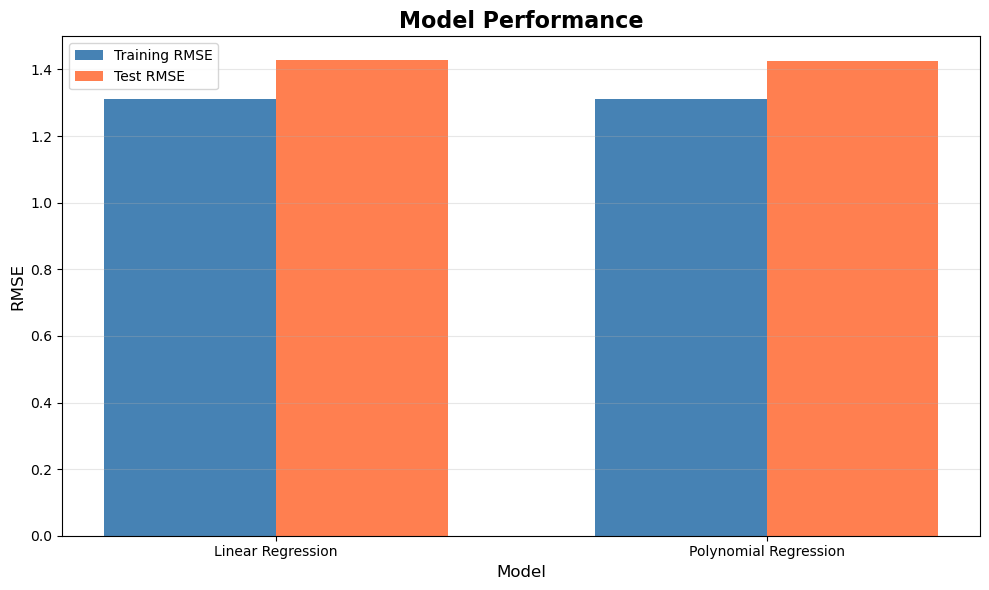

'--------------------------------------------------'

'MODEL COMPARISON SUMMARY'

'--------------------------------------------------'

'Linear Regression Test RMSE:'

np.float64(1.4281502768638166)

'Polynomial Regression Test RMSE:'

np.float64(1.4267609251731646)

'Difference:'

np.float64(0.0013893516906520187)

In [30]:
# Evaluate and compare the models to choose the best one
display('Evaluating the models and choosing one')
display('-' * 50)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Training RMSE': [train_rmse, poly_train_rmse],
    'Test RMSE': [test_rmse, poly_test_rmse]
})

display('Model Performance Comparison:')
display(comparison_df)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Training RMSE'], width, label='Training RMSE', color='steelblue')
bars2 = ax.bar(x + width/2, comparison_df['Test RMSE'], width, label='Test RMSE', color='coral')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('Model Performance', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Comparison summary
display('-' * 50)
display('MODEL COMPARISON SUMMARY')
display('-' * 50)

# Calculate differences
rmse_difference = abs(test_rmse - poly_test_rmse)
display('Linear Regression Test RMSE:', test_rmse)
display('Polynomial Regression Test RMSE:', poly_test_rmse)
display('Difference:', rmse_difference)


### Results

Based on the output the Polynomial Regression model has a lower test RMSE compared to the Linear Regression model. This indicates that the Polynomial Regression model captures the data patterns better and is likely to provide more accurate predictions on the data. I believe the Polynomial Regression model is best for my final analysis.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
* https://medium.com/latinxinai/evaluation-metrics-for-regression-models-03f2143ecec2
* https://realpython.com/linear-regression-in-python/ 
* https://realpython.com/how-to-use-numpy-arange/ 

In [32]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 23622 bytes to source.py
